#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [40]:
model = Sequential()

In [8]:
#卷積層1

In [41]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [42]:
model.add(Dropout(rate=0.25))

In [43]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [44]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [45]:
model.add(Dropout(0.25))

In [46]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [47]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [48]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [49]:
model.add(Dense(10, activation='softmax'))

In [50]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [30]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [31]:
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

model.compile(loss='mean_squared_error', optimizer = 'sgd', metrics=['accuracy'])
train_history = model.fit(x_img_train_normalize,y_label_train_OneHot, validation_split=0.25, epochs = 12, batch_size = 128, verbose=1)



Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 93s 2ms/step - loss: 0.0904 - accuracy: 0.1034 - val_loss: 0.0899 - val_accuracy: 0.1262
Epoch 2/12
37500/37500 [==============================] - 91s 2ms/step - loss: 0.0902 - accuracy: 0.1107 - val_loss: 0.0898 - val_accuracy: 0.1374
Epoch 3/12
37500/37500 [==============================] - 94s 2ms/step - loss: 0.0900 - accuracy: 0.1184 - val_loss: 0.0897 - val_accuracy: 0.1430
Epoch 4/12
37500/37500 [==============================] - 90s 2ms/step - loss: 0.0898 - accuracy: 0.1234 - val_loss: 0.0897 - val_accuracy: 0.1518
Epoch 5/12
37500/37500 [==============================] - 90s 2ms/step - loss: 0.0897 - accuracy: 0.1289 - val_loss: 0.0896 - val_accuracy: 0.1613
Epoch 6/12
37500/37500 [==============================] - 89s 2ms/step - loss: 0.0896 - accuracy: 0.1362 - val_loss: 0.0895 - val_accuracy: 0.1701
Epoch 7/12
37500/37500 [==============================] - 91s 2ms/s

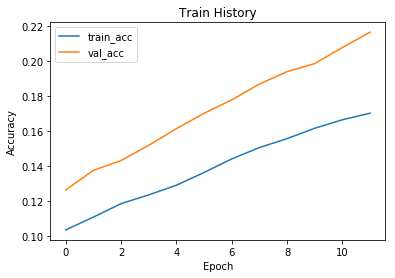

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
show_train_history('accuracy','val_accuracy')
#show_train_history('loss','val_loss')

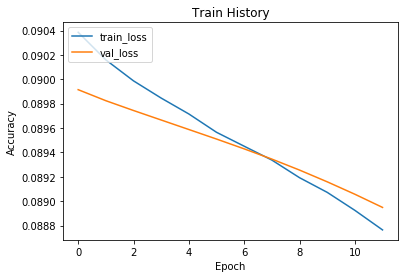

In [34]:
#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_loss', 'val_loss'], loc='upper left')
    plt.show()
show_train_history('loss','val_loss')

In [35]:
test_acc_error = model.evaluate(x_img_test_normalize,y_label_test_OneHot)
print('loss:',test_acc_error[0])
print('acc:',test_acc_error[1])

10000/10000 [==============================] - 5s 458us/step
loss: 0.0889540650010109
acc: 0.21449999511241913


In [51]:
model.compile(loss='binary_crossentropy', optimizer = 'sgd', metrics=['accuracy'])
train_history = model.fit(x_img_train_normalize,y_label_train_OneHot, validation_split=0.25, epochs = 12, batch_size = 128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 91s 2ms/step - loss: 0.3256 - accuracy: 0.9000 - val_loss: 0.3226 - val_accuracy: 0.9000
Epoch 2/12
37500/37500 [==============================] - 90s 2ms/step - loss: 0.3212 - accuracy: 0.9000 - val_loss: 0.3199 - val_accuracy: 0.9000
Epoch 3/12
37500/37500 [==============================] - 90s 2ms/step - loss: 0.3171 - accuracy: 0.9000 - val_loss: 0.3165 - val_accuracy: 0.9000
Epoch 4/12
37500/37500 [==============================] - 89s 2ms/step - loss: 0.3119 - accuracy: 0.9000 - val_loss: 0.3121 - val_accuracy: 0.9000
Epoch 5/12
37500/37500 [==============================] - 89s 2ms/step - loss: 0.3055 - accuracy: 0.9000 - val_loss: 0.3066 - val_accuracy: 0.9000
Epoch 6/12
37500/37500 [==============================] - 89s 2ms/step - loss: 0.2994 - accuracy: 0.9000 - val_loss: 0.3015 - val_accuracy: 0.9000
Epoch 7/12
37500/37500 [==============================] - 89s 2ms/st

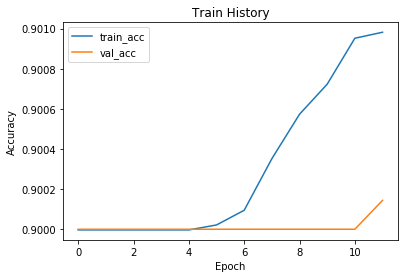

In [52]:
#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
show_train_history('accuracy','val_accuracy')
#show_train_history('loss','val_loss')

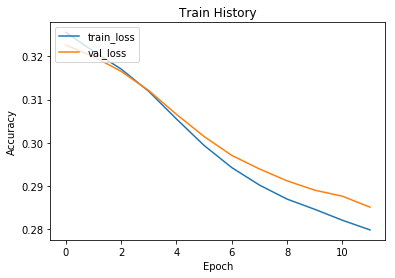

In [53]:
#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_loss', 'val_loss'], loc='upper left')
    plt.show()
show_train_history('loss','val_loss')

In [54]:
test_acc_error = model.evaluate(x_img_test_normalize,y_label_test_OneHot)
print('loss:',test_acc_error[0])
print('acc:',test_acc_error[1])

10000/10000 [==============================] - 5s 457us/step
loss: 0.2839652219772339
acc: 0.9001574516296387
